# Prac 3
## Q1

In [1]:
import pandas

In [5]:
pima_data = pandas.read_csv('pima_indians_diabetes.csv')

In [46]:
pima_data_train = pima_data.loc[:499,:]

In [48]:
pima_data_test = pima_data.loc[500:,:]

In [ ]:
from scipy.stats import multivariate_normal

In [52]:
pos_data = pima_data_train[pima_data_train['9']=='pos'] 

In [53]:
neg_data = pima_data_train[pima_data_train['9']=='neg']

In [54]:
mu1 = pos_data.mean()
mu2 = neg_data.mean()

In [55]:
S1 = pos_data.cov()
S2 = neg_data.cov()

In [56]:
norm1 = multivariate_normal(mu1, S1)

In [57]:
norm2 = multivariate_normal(mu2,S2)

In [58]:
P1 = len(pos_data)/(len(pos_data)+len(neg_data))
P2 = len(neg_data)/(len(pos_data)+len(neg_data))

In [59]:
pima_data_train_X = pima_data_train.drop(['9'], axis=1)

In [60]:
pdf1_x = norm1.pdf(pima_data_train_X)*P1
pdf2_x = norm2.pdf(pima_data_train_X)*P2
post1 = pdf1_x/(pdf1_x + pdf2_x)
post2 = pdf2_x/(pdf1_x + pdf2_x)

In [81]:
pred = post1>post2

In [72]:
labels = pima_data_train['9']
labels[labels=='pos'] = True
labels[labels=='neg'] = False

Training Error

In [82]:
(sum((labels == pred))/len(pred))*100

75.4

In [90]:
pima_data_test_X = pima_data_test.drop(['9'], axis=1)
pdf1_x = norm1.pdf(pima_data_test_X)*P1
pdf2_x = norm2.pdf(pima_data_test_X)*P2
post1 = pdf1_x/(pdf1_x + pdf2_x)
post2 = pdf2_x/(pdf1_x + pdf2_x)

In [91]:
pred = post1>post2

In [92]:
labels = pima_data_test['9']
labels[labels=='pos'] = True
labels[labels=='neg'] = False

c:\users\llewyn\code\data7703practue10\data7703\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\llewyn\code\data7703practue10\data7703\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Test Error

In [93]:
(sum((labels == pred))/len(pred))*100

77.98507462686567

## Q3

In [95]:
iris_data = pandas.read_csv('iris.txt',header=None)

In [106]:
iris_data

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: 3, Length: 150, dtype: float64

In [97]:
iris_data = iris_data[3]

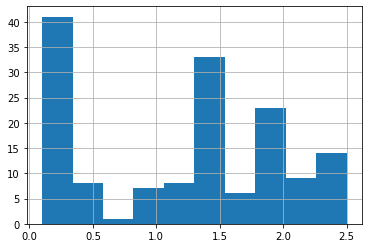

In [99]:
iris_data.hist(bins=10)

In [102]:
hist_bins = [2,4,8,10,50,100,150]

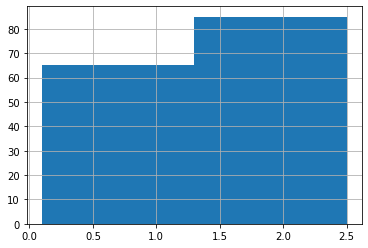

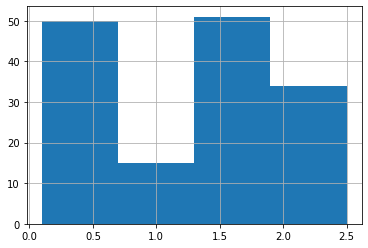

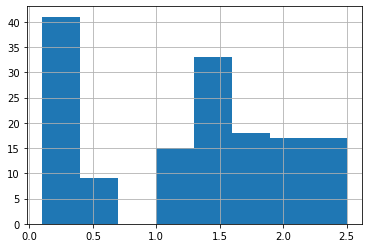

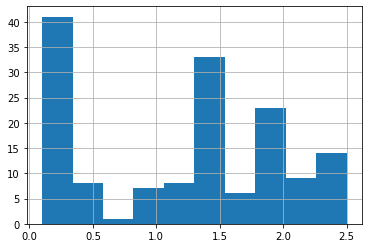

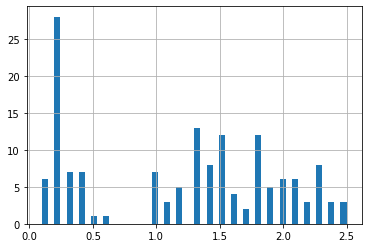

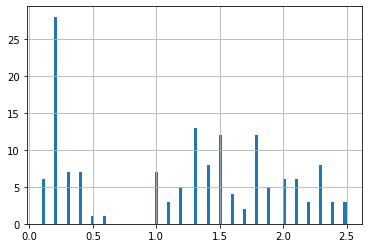

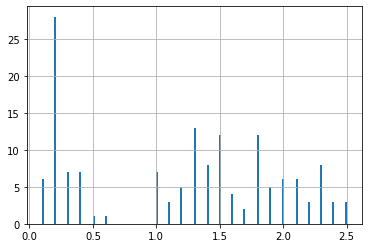

In [105]:
import matplotlib.pyplot as plt
for b in hist_bins:
    iris_data.hist(bins=b)
    plt.show()

In [107]:
from scipy import stats
from sklearn.neighbors import KernelDensity

In [110]:
iris_data.shape

(150,)

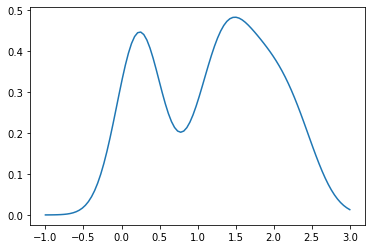

In [115]:
import numpy as np
x = np.linspace(-1,3,100)
plt.plot(x,stats.gaussian_kde(iris_data)(x))

In [111]:
stats.gaussian_kde(iris_data)

In [118]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(iris_data).reshape((-1,1)))

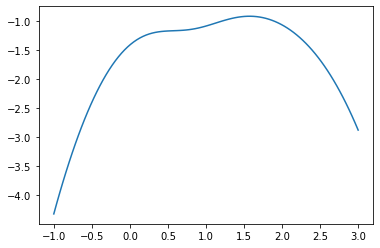

In [130]:
plt.plot(x,kde.score_samples(x.reshape(-1,1)))